## Importing Libreries

In [205]:
import cv2
import numpy as np
import scipy.signal as sig
from matplotlib import pyplot as plt

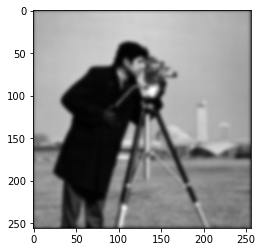

In [206]:
img = cv2.imread("p2.tif",0)
plt.imshow(img,cmap='gray');

#### The P filter which sets negative pixels to zero

In [207]:
def p_filter(img):
    out = img
    out[out<0] = 0
    return out

#x = img - 100*np.ones(img.shape)
#plt.imshow(p_filter(x),cmap='gray');

#### part 1, with beta = 0.1, N = 20, 160, 500

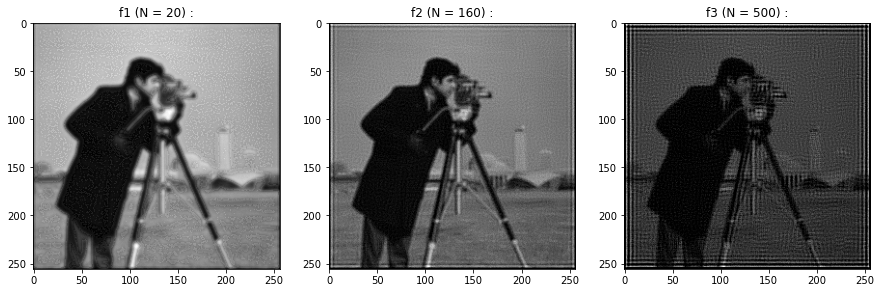

In [209]:
b = 0.1 #beta

N1 = 20
f1 = img
for i in range(N1):
    f1 = p_filter(f1 + b*(img - cv2.GaussianBlur(f1,(7,7),2,2)))

N2 = 160
f2 = img
for i in range(N2):
    f2 = p_filter(f2 + b*(img - cv2.GaussianBlur(f2,(7,7),2,2)))

N3 = 500
f3 = img
for i in range(N3):
    f3 = p_filter(f3 + b*(img - cv2.GaussianBlur(f3,(7,7),2,2)))
    
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(f1,cmap='gray');
plt.title('f1 (N = '+str(N1)+') :')

plt.subplot(1,3,2)
plt.imshow(f2,cmap='gray');
plt.title('f2 (N = '+str(N2)+') :')

plt.subplot(1,3,3)
plt.imshow(f3,cmap='gray');
plt.title('f3 (N = '+str(N3)+') :');

#### For low iterations image is still blured but when you keep going the part with beta starts to popup and sharpens the image, after a lot of iterations you start to lose detailes due to function P and also the filter starts to make some distortions on image because it keeps summing points over and over untill they converge to a pattern similar to the shape of filter in time domain.

## Inverse Filter

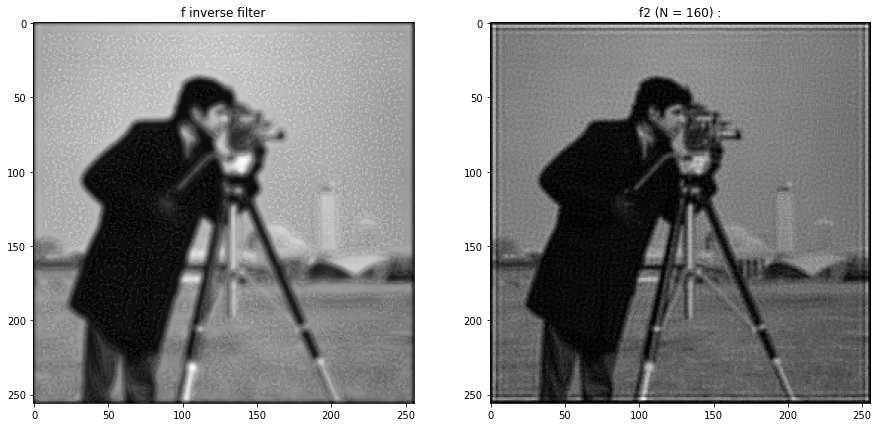

In [210]:
kernel = cv2.getGaussianKernel(7, 2)
kernel = kernel * kernel.T
kernelfft = np.fft.fftshift(np.fft.fft2(kernel, img.shape))
#print(kernelfft.shape)
imgfft = np.fft.fftshift(np.fft.fft2(img))

f_fft = imgfft/kernelfft
f = np.fft.ifft2(np.fft.ifftshift(f_fft))

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(f1,cmap='gray');
plt.title('f inverse filter')

plt.subplot(1,2,2)
plt.imshow(f2,cmap='gray');
plt.title('f2 (N = '+str(N2)+') :');

#### As you might expected the repeating filter makes a better resault but with the price of more computational power and energy.